# Example Computations

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(ticks=True, grid=True, gridlines='--')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Prepping a Toy Dataset

In [2]:
creditCardDf = pd.read_csv('./data/CC GENERAL.csv').set_index('CUST_ID')

In [3]:
creditCardDf.shape

(8950, 17)

In [4]:
pd.DataFrame({
    'type' : creditCardDf.dtypes,
    'num_null' : creditCardDf.isnull().sum()
})

,type,num_null
BALANCE,float64,0
BALANCE_FREQUENCY,float64,0
PURCHASES,float64,0
ONEOFF_PURCHASES,float64,0
INSTALLMENTS_PURCHASES,float64,0
CASH_ADVANCE,float64,0
PURCHASES_FREQUENCY,float64,0
ONEOFF_PURCHASES_FREQUENCY,float64,0
PURCHASES_INSTALLMENTS_FREQUENCY,float64,0
CASH_ADVANCE_FREQUENCY,float64,0


In [5]:
creditCardDf['MINIMUM_PAYMENTS'].fillna(0, inplace=True)
creditCardDf['CREDIT_LIMIT'].fillna(creditCardDf['CREDIT_LIMIT'].mean(), inplace=True)

## PCA

### Doing it Manually

In [6]:
X = creditCardDf.values

In [7]:
X = (X - X.mean(axis=0))

In [8]:
Sigma = np.dot(X.T, X) / X.shape[0]

In [9]:
eigValues, eigVectors = np.linalg.eig(Sigma)

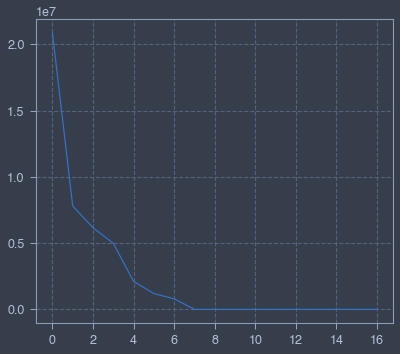

In [10]:
plt.figure()
plt.plot(eigValues)

### Comparing to PCA package

In [11]:
pca = PCA().fit(X)

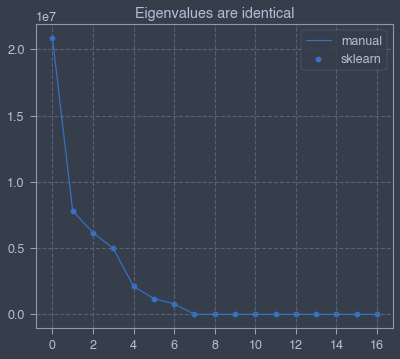

In [12]:
plt.figure()
plt.plot(range(len(eigValues)), eigValues, label='manual')
plt.scatter(range(len(pca.explained_variance_)), pca.explained_variance_, label='sklearn')
plt.title('Eigenvalues are identical')
plt.legend()

Text(0.5, 1.0, 'Eigenvectors seem to mostly agree')

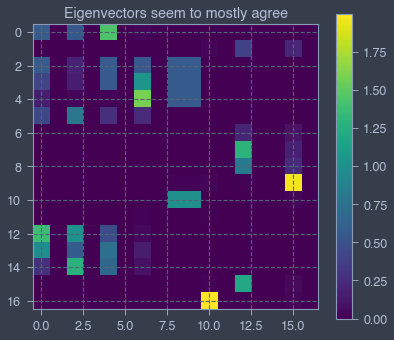

In [13]:
plt.figure()
plt.imshow(np.abs(pca.components_.T - eigVectors))
plt.colorbar()
plt.title('Eigenvectors seem to mostly agree')

Text(0.5, 1.0, 'They differ by a signed permutation matrix.')

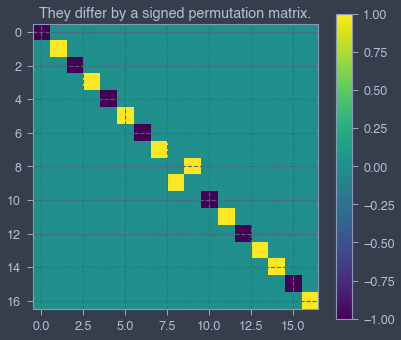

In [14]:
perm = np.dot(np.linalg.inv(eigVectors), pca.components_.T)

plt.figure()
plt.imshow(perm)
plt.colorbar()
plt.title('They differ by a signed permutation matrix.')

I get the signed part, since that is arbitrary.  Shouldn't the eigenvectors be more or less ordered though?  I guess one of the eigenspaces has dimension 2, which is surprising to me.  Oh duh, the matrix is not full rank, so the eigenvectors in the kernel probably get assigned some eigenvalues that are below the threshold for floating point arithmetic error.